In [1]:
import os, sys
sys.path.insert(0, "..")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

In [23]:
from sklearn.metrics import precision_recall_fscore_support

clf = LogisticRegression(max_iter=200, random_state=31).fit(X_train, y_train)
precision_recall_fscore_support(y_test, clf.predict(X_test), average='macro')

d:\Users\Michal\Documents\Studia\semestr2\NLP\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9953137395060611, 0.9901016667088978, 0.9926788057344849, None)

In [8]:
clf_rf = RandomForestClassifier(max_depth=3, random_state=31).fit(X_train, y_train)
# clf_rf.feature_importances_

In [10]:
ind = np.argsort(clf_rf.feature_importances_)[-100:]
X_train_selected = X_train[:, ind]

In [11]:
from sklearn.metrics import precision_recall_fscore_support

clf = LogisticRegression(max_iter=200).fit(X_train_selected, y_train)
precision_recall_fscore_support(y_test, clf.predict(X_test[:, ind]), average='macro')

d:\Users\Michal\Documents\Studia\semestr2\NLP\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9953385780699284, 0.9901086321140522, 0.9926945112402366, None)

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(seed=2)
xgb.fit(X_train, y_train)
precision_recall_fscore_support(y_test, xgb.predict(X_test), average='macro')


(0.9991404454977943, 0.9973944280534299, 0.9982642206325865, None)

In [3]:
from src.models.custom_models import LogisticRegressionRF

lgrf = LogisticRegressionRF(features_num=100)
lgrf.fit(X_train, y_train)

d:\Users\Michal\Documents\Studia\semestr2\NLP\nlp\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionRF()

In [8]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf.fit(X_train, y_train)
precision_recall_fscore_support(y_test, clf.predict(X_test), average='macro')

(0.9234664926434294, 0.9446357246860418, 0.9334593696539852, None)

[Text(209.25, 190.26, 'X[18] <= -0.236\ngini = 0.344\nsamples = 1105907\nvalue = [861401, 244506]'),
 Text(167.4, 135.9, 'X[21] <= -0.311\ngini = 0.191\nsamples = 964480\nvalue = [861401, 103079]'),
 Text(83.7, 81.53999999999999, 'X[19] <= -0.552\ngini = 0.499\nsamples = 150734\nvalue = [77810, 72924]'),
 Text(41.85, 27.180000000000007, 'gini = 0.438\nsamples = 106526\nvalue = [34437, 72089]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.037\nsamples = 44208\nvalue = [43373, 835]'),
 Text(251.10000000000002, 81.53999999999999, 'X[14] <= -0.127\ngini = 0.071\nsamples = 813746\nvalue = [783591, 30155]'),
 Text(209.25, 27.180000000000007, 'gini = 0.04\nsamples = 799944\nvalue = [783591, 16353]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 13802\nvalue = [0, 13802]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 141427\nvalue = [0, 141427]')]

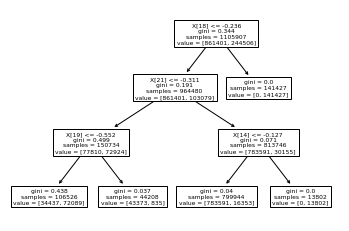

In [9]:
from sklearn import tree
tree.plot_tree(clf)